## Health Risk Prediction

###
### Steps I need to follow :

- **Problem Understanding**
- **Dataset Selection**
- **Data Analysis (EDA)**
- **Data Cleaning**
- **Data Preprocessing**
- **Feature Understanding**
- **ML Model Basics**
- **Training the Model**
- **Evaluation**
- **Interpretation of Results**
- **Mini Documentation (for resume + interview)**

### Step - 1 : Problem Understanding

#### What is our problem?
##### We want to predict health risk of a person based on details like:
##### 1)Age
##### 2)BMI
##### 3)Blood Pressure
##### 4)Glucose
##### 5)Lifestyle factors, etc.
#### What does “Health Risk Prediction” mean?
##### It means:
##### Using past data of people → learn patterns → predict whether a new person is at low / medium / high risk.

### Step - 2 : DataSet Selection

#### Note : “A bad dataset can destroy a good ML model.”

#### DataSet Name : "Pima Indians Diabetes Dataset"
#### Why THIS Dataset?             
#### 1)Beginner-friendly
#### 2)Real health data
#### 3)Clean size	        
#### 4)Popular	        
#### 5)Binary prediction
#### Each row = one person
#### Each column = health measurement
#### Features (Inputs)
#### 1)Pregnancies
#### 2)Glucose
#### 3)BloodPressure
#### 4)SkinThickness
#### 5)Insulin
#### 6)BMI
#### 7)DiabetesPedigreeFunction
#### 8)Age
#### Target (Output)
#### 1)Outcome
#### 0 → No Diabetes (Low Risk)
#### 1 → Diabetes (High Risk)

### Step - 3 : DataAnalysis(EDA)
#### What is EDA? (Exploratory Data Analysis)
##### Systematically analyzing data to understand its structure, patterns, distributions, and problems before building any model.
##### Think of EDA as:
##### 🩺 Health check of the dataset
##### 🔍 Finding hidden issues
##### 🧠 Developing intuition about data

##### What EDA includes:

##### 1. Dataset structure understanding

##### 2. Target distribution

##### 3. Feature distributions

##### 4. Box plots

##### 5. Histograms

##### 6. Outlier analysis (IQR, boxplot, z-score understanding)

##### 7. Feature vs target analysis

##### 8. Correlation analysis

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# STEP-3.1: Load Dataset & Understand Structure
data = pd.read_csv("diabetes.csv")
data.shape # rows -> number of people & columns -> features + target

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns # all are in numeric format so no need to do encoding

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### WHY analyze target first?
#### Because:
#### It tells us what problem we’re solving
#### It reveals class imbalance
#### It affects model choice & evaluation

In [ ]:
# STEP-3.2: Target Variable Analysis
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

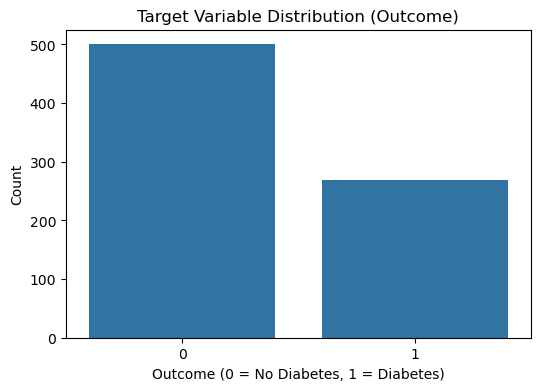

In [ ]:
# Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data)
plt.title("Target Variable Distribution (Outcome)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


### Insight:
#### 0 -> Non - Diabetic
#### 1 -> Diabetic
#### As per above analysis, it says Non - Diabetic > Diabetic persons and dataset is imbalanced

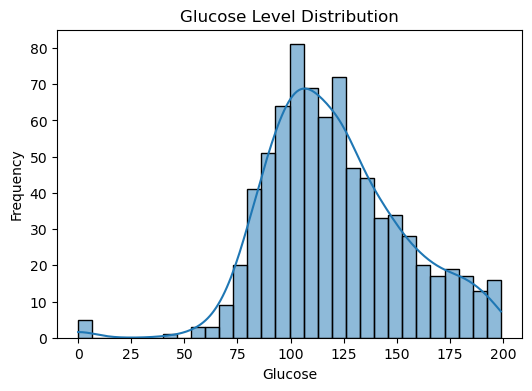

In [ ]:
# STEP-3.3: Feature Distribution Analysis
# 1) Glucose
plt.figure(figsize=(6,4))
sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()


#### The Graph is touching x-axis at 0 it means there are no zero values in the glucose column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the glucose. So Treat them as Missing values.

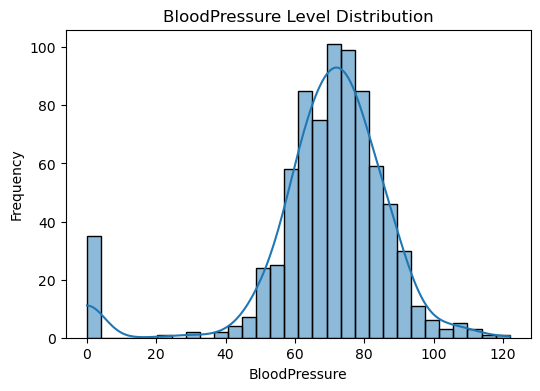

In [ ]:
# 2) BloodPressure
plt.figure(figsize=(6,4))
sns.histplot(data['BloodPressure'], bins=30, kde=True)
plt.title("BloodPressure Level Distribution")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the BloodPressure column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the BloodPressure. So Treat them as Missing values.

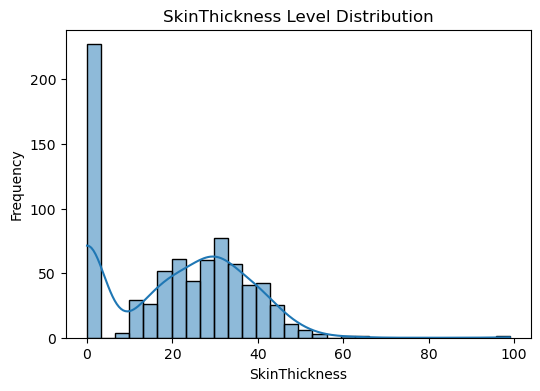

In [ ]:
# 3) SkinThickness
plt.figure(figsize=(6,4))
sns.histplot(data['SkinThickness'], bins=30, kde=True)
plt.title("SkinThickness Level Distribution")
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the SkinThickness column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the SkinThickness. So Treat them as Missing values.

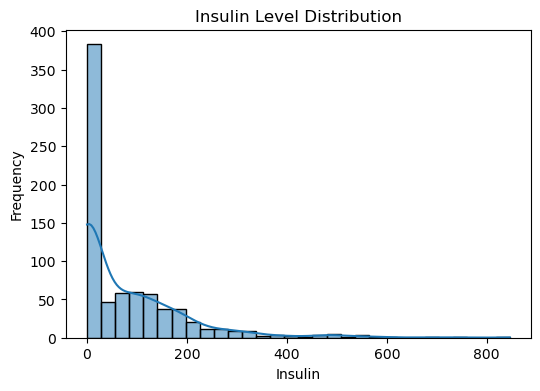

In [ ]:
# 4) Insulin
plt.figure(figsize=(6,4))
sns.histplot(data['Insulin'], bins=30, kde=True)
plt.title("Insulin Level Distribution")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the Insulin column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the Insulin. So Treat them as Missing values.

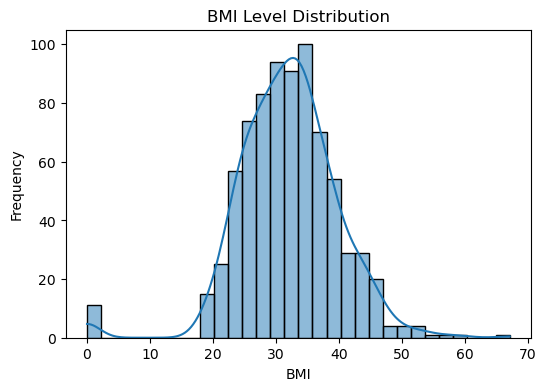

In [ ]:
# 5) BMI
plt.figure(figsize=(6,4))
sns.histplot(data['BMI'], bins=30, kde=True)
plt.title("BMI Level Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

#### The Graph is touching x-axis at 0 it means there are no zero values in the BMI column.So Practically when we analyze the real diabetic person health or any non-diabetic person health we can't have zero values in the BMI. So Treat them as Missing values.

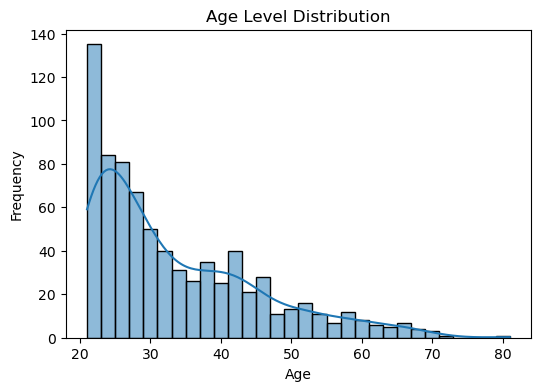

In [ ]:
# 6) Age
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Level Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### There are no 0 values in age column. So we can't treat them as missing values.

In [ ]:
# STEP-3.4 : Replace 0 with Nan Values
invalid_zero_cols = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]
data[invalid_zero_cols] = data[invalid_zero_cols].replace(0, np.nan)

### Insight:
##### In Columns where 0 is medically impossible.
##### So if we donot replace 0 with Nan ML model will accept 0 and treat as a real value, But in medical context 0 is invalid, keeping it will corrupt patterns.
##### So Now we are replacing 0 with Nan so that ML model cannot work with Nan values.

In [ ]:
# STEP-3.5: Missing Value Analysis & Imputation
data.isnull().sum() # checks Null Values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### After converting zeros to NaN:
#### 1)ML models cannot work with NaN
#### 2)Dropping rows will lose valuable medical data
#### 3)So we must fill missing values intelligently

#### Distribution = how data values are spread or arranged.
#### A normal distribution looks like a bell shape 🔔.
#### When data is not balanced, it is called skewed data.
#### Outliers = values that are very far from most data.
#### Mean is affected by outliers.(This Lies)
#### Median is not affected by outliers.(This tells the truth)

In [ ]:
data[invalid_zero_cols] = data[invalid_zero_cols].fillna(data[invalid_zero_cols].median())

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

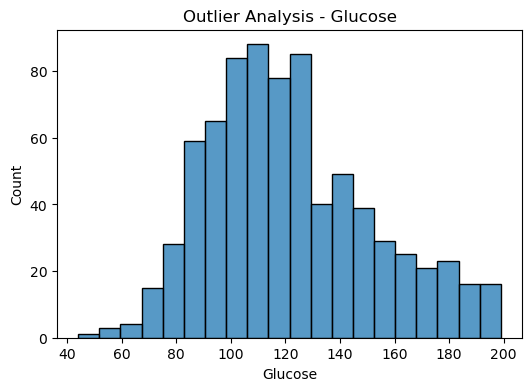

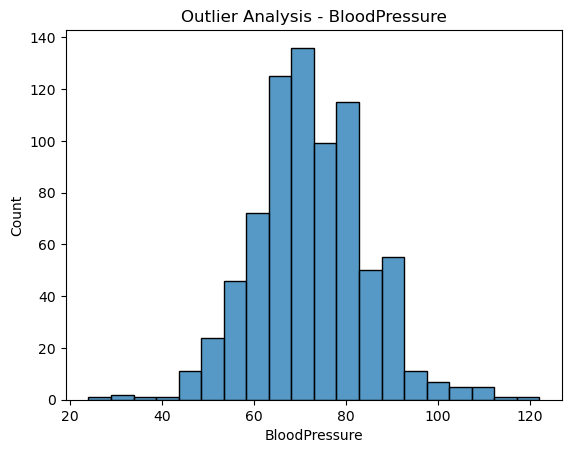

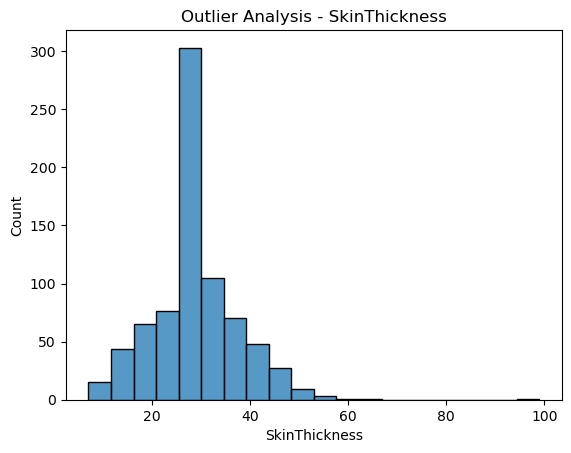

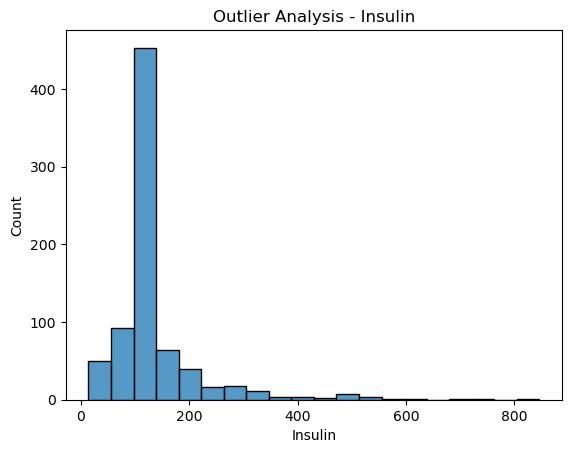

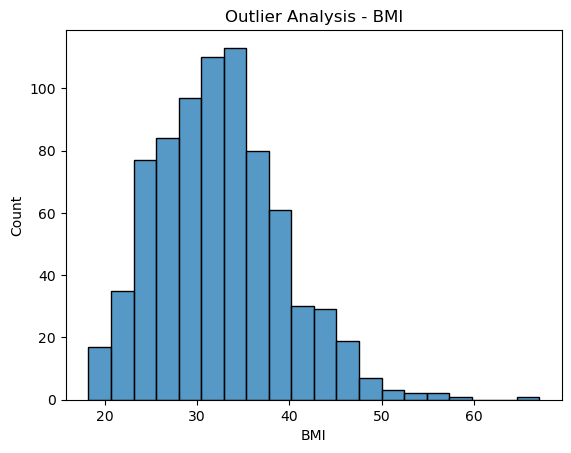

In [ ]:
# STEP-3.6 : OUTLIER ANALYSIS
plt.figure(figsize=(6,4))
for i in invalid_zero_cols:
  sns.histplot(data=data,x=i,bins=20)
  plt.title(f"Outlier Analysis - {i}")
  plt.xlabel(f"{i}")
  plt.show()


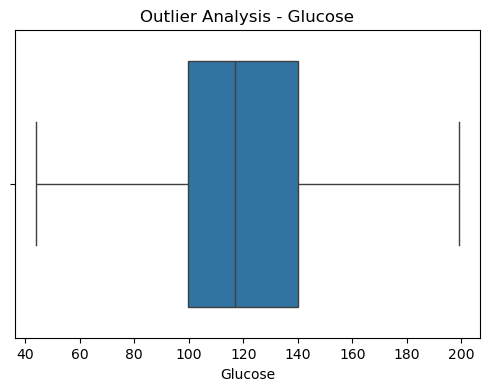

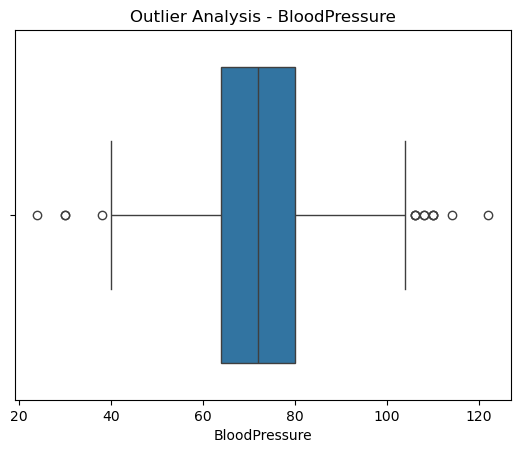

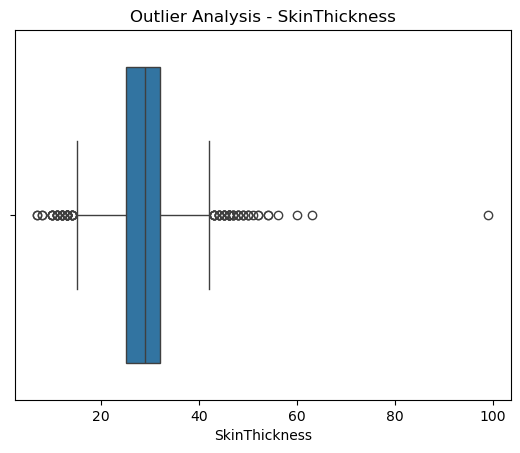

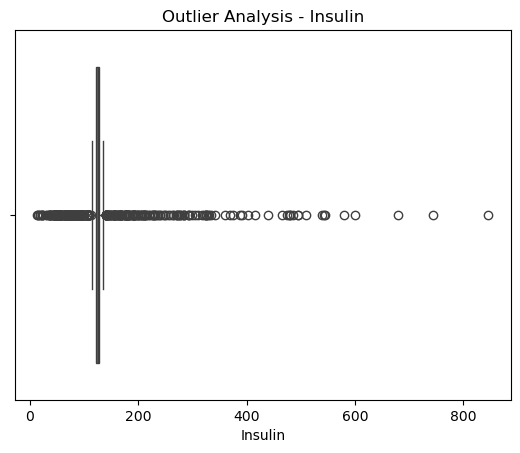

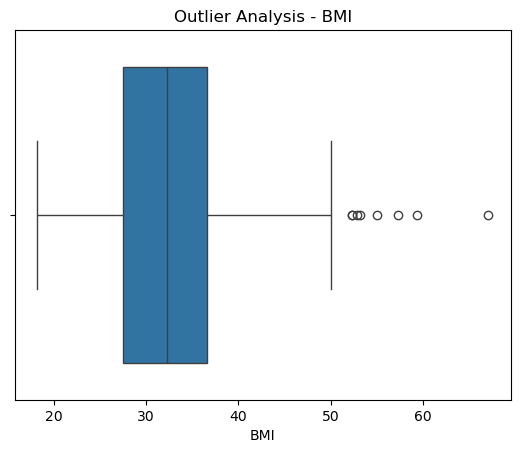

In [ ]:
# 1) Using BoxPlot
plt.figure(figsize=(6,4))
for i in invalid_zero_cols:
  sns.boxplot(data=data,x=i)
  plt.title(f"Outlier Analysis - {i}")
  plt.xlabel(f"{i}")
  plt.show()


#### 1) Boxplot is a visual representation of outliers
#### 2)IQR focuses on the middle 50% of the data, ignoring extreme values.
#### IQR = Q3 − Q1 (75th percentile − 25th percentile)  ( IQR behavemedian-like (robust), but it is not the median itself ), Works well for skewed data, Best choice for medical datasets
#### 3)Z-score tells how far a value is from the mean in terms of standard deviation units.
#### Z-score depends on mean
#### So Z-score becomes unreliable for skewed medical data

#### Quartile means dividing data into 4 equal parts.
#### Q1 is the middle of the lower half of data.
#### Q3 is the middle of the upper half of data.
#### We are not removing outliers using IQR because, in medical data, they represent high-risk patients, and removing them has no point.

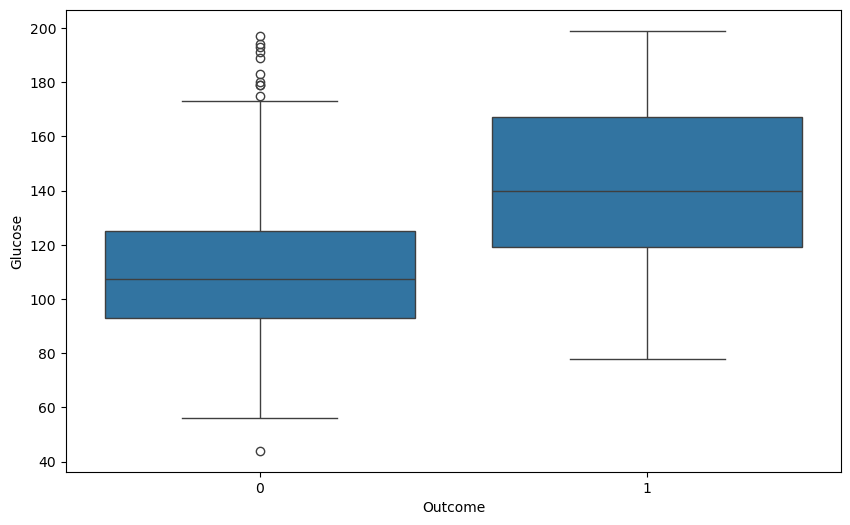

In [ ]:
# STEP-3.7 : FEATURE vs TARGET ANALYSIS
# How do features behave differently for diabetic vs non-diabetic people?
# This step tells us about the relationship between features and target, and it gives us strong evidence about which features are most likely to impact the target in unseen data.

# Glucose vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.show()

#### Glucose shows a strong shift in central tendency between the two classes.
#### Most diabetic patients have glucose values higher than most non-diabetic patients.
#### Diabetic patients show more variability in glucose
#### Non-diabetic patients are more consistent
#### Some non-diabetic people temporarily had high glucose
#### These are real people, not Outliers.


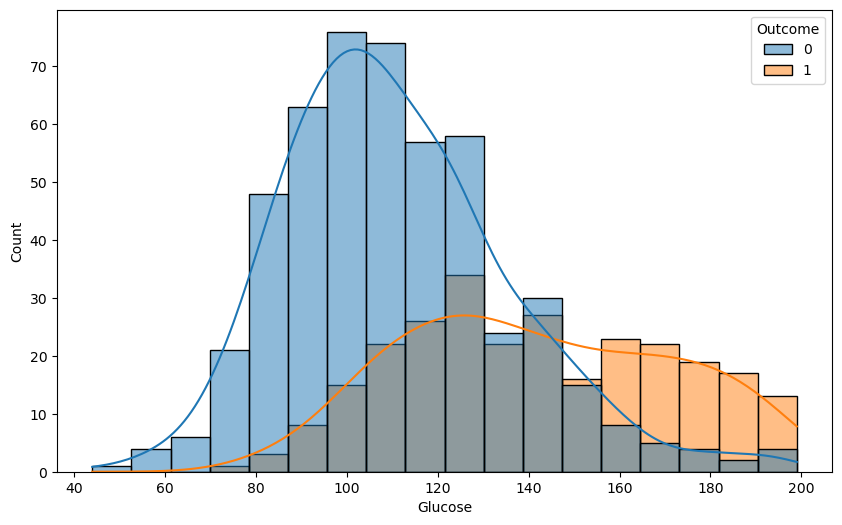

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Glucose",kde=True,hue="Outcome")
plt.show()


#### “The histogram shows that non-diabetic individuals predominantly have glucose values concentrated around 90–110, while diabetic individuals show a right-shifted distribution with higher glucose levels, peaking around 130–150. Although there is overlap between the two classes, the clear rightward shift and heavier tail for diabetic patients indicate that glucose is a strong predictive feature. However, overlap suggests that glucose alone is insufficient and should be used in combination with other features.”

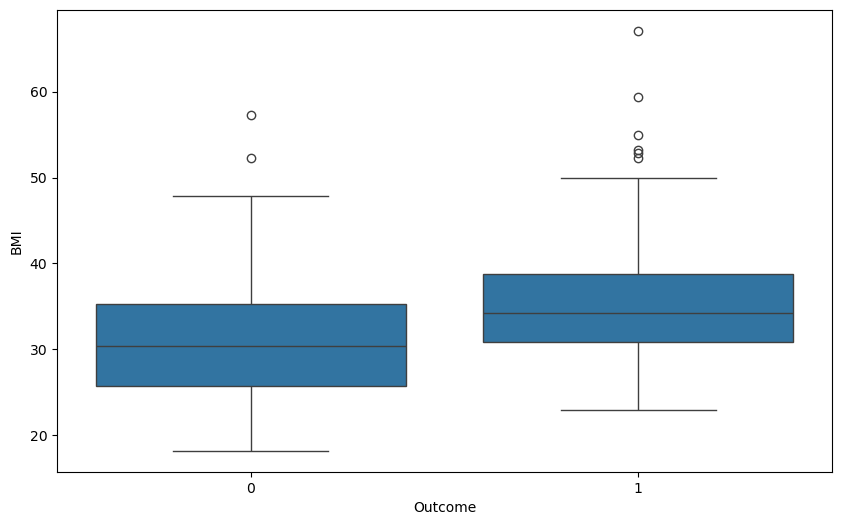

In [ ]:
# BMI vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.show()


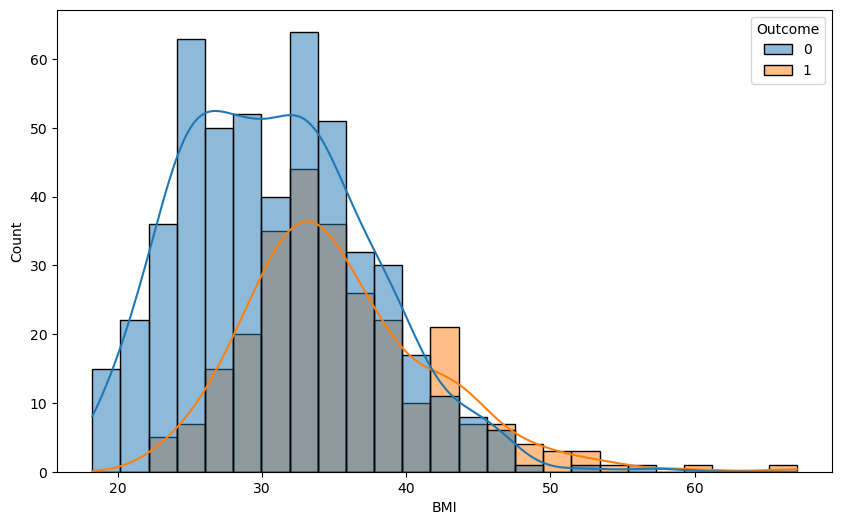

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="BMI",kde=True,hue="Outcome")
plt.show()


#### The histogram shows that diabetic patients generally have higher BMI values, with the distribution shifted to the right compared to non-diabetic patients. However, there is considerable overlap between the two groups, indicating that while BMI is associated with diabetes risk, it cannot alone distinguish diabetic from non-diabetic individuals. The right-skewed tail suggests the presence of obese high-risk patients, which are clinically meaningful.

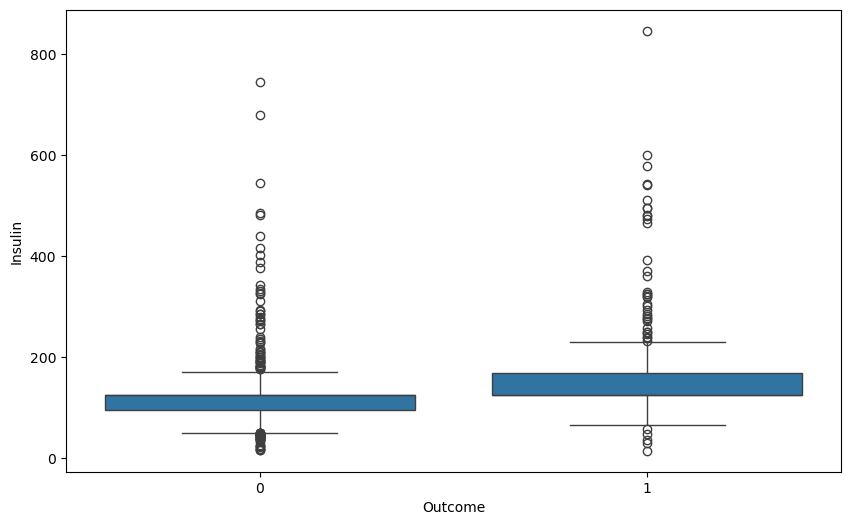

In [ ]:
# Insulin vs outcome
plt.figure(figsize=(10,6))
sns.boxplot(x='Outcome', y='Insulin', data=data)
plt.show()

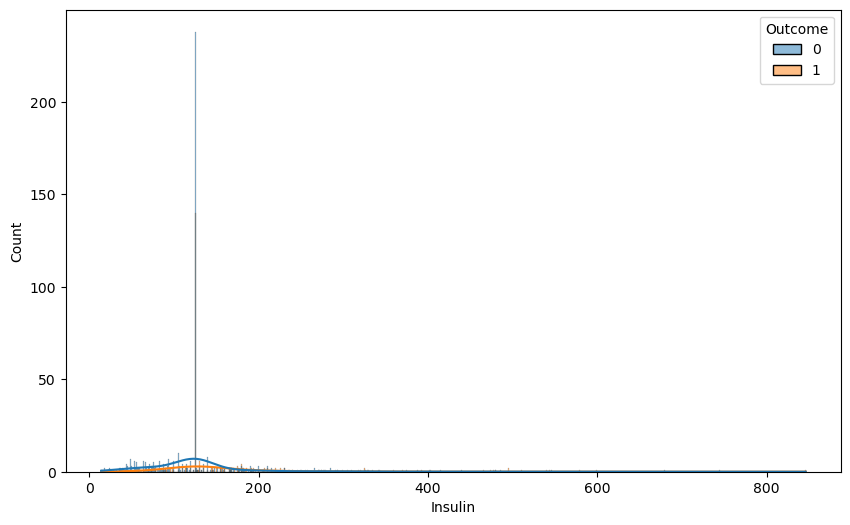

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Insulin",kde=True,hue="Outcome")
plt.show()

#### Insulin Feature is not as strong as other features because if we clearly observe the curver non-diabetic people at median level are having higher insulin levels than diabetic people

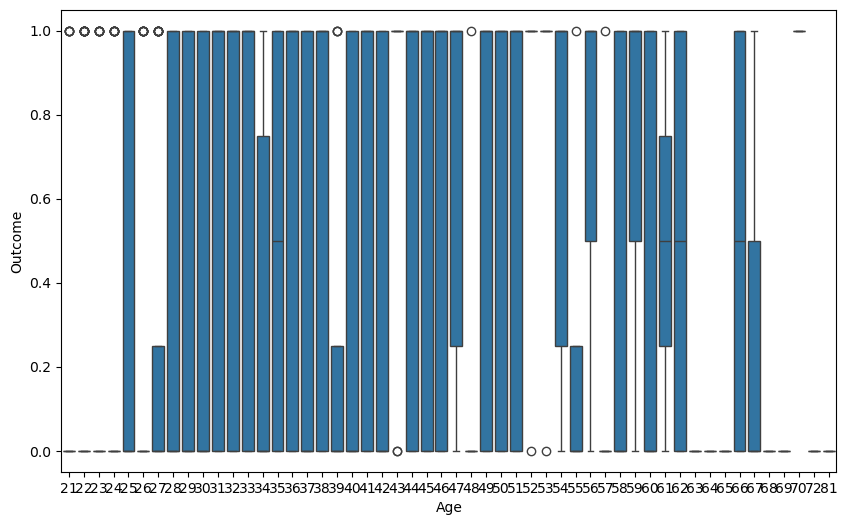

In [ ]:
# Age vs Outcome
plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='Outcome', data=data)
plt.show()

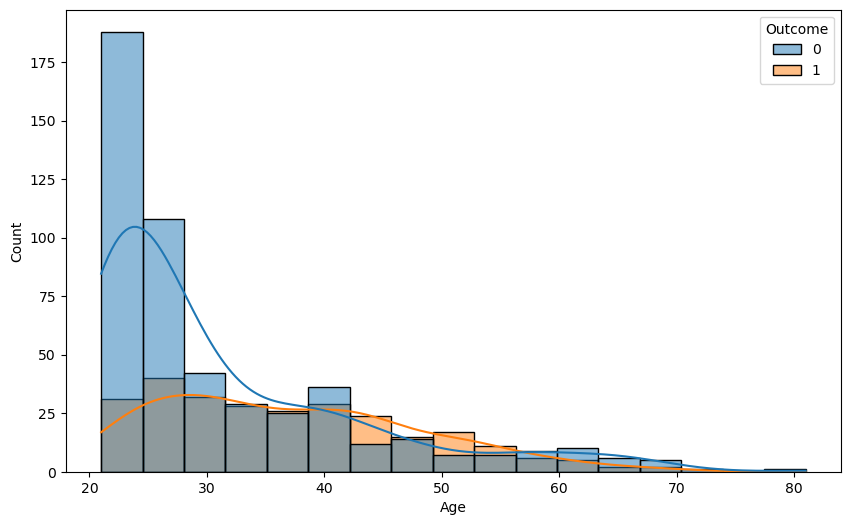

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Age",kde=True,hue="Outcome")
plt.show()

In [ ]:
# STEP-3.8: CORRELATION ANALYSIS ( feature - feature relationships)
corr_matrix = data.corr()

#### What is CORRELATION? (Pearson's Correlation Coefficient)
#### (When one feature increases, does another feature also increase or decrease)
#### Correlation is a statistical measure that quantifies the strength and direction of the relationship between two variables. It ranges from -1 to 1, where:

#### -1: Perfect negative correlation
#### 0: No correlation
#### 1: Perfect positive correlation
#### Correlation value ranges from −1 to +1
#### Low correlation does NOT mean useless
#### Multicollinearity = Two features tell the same story

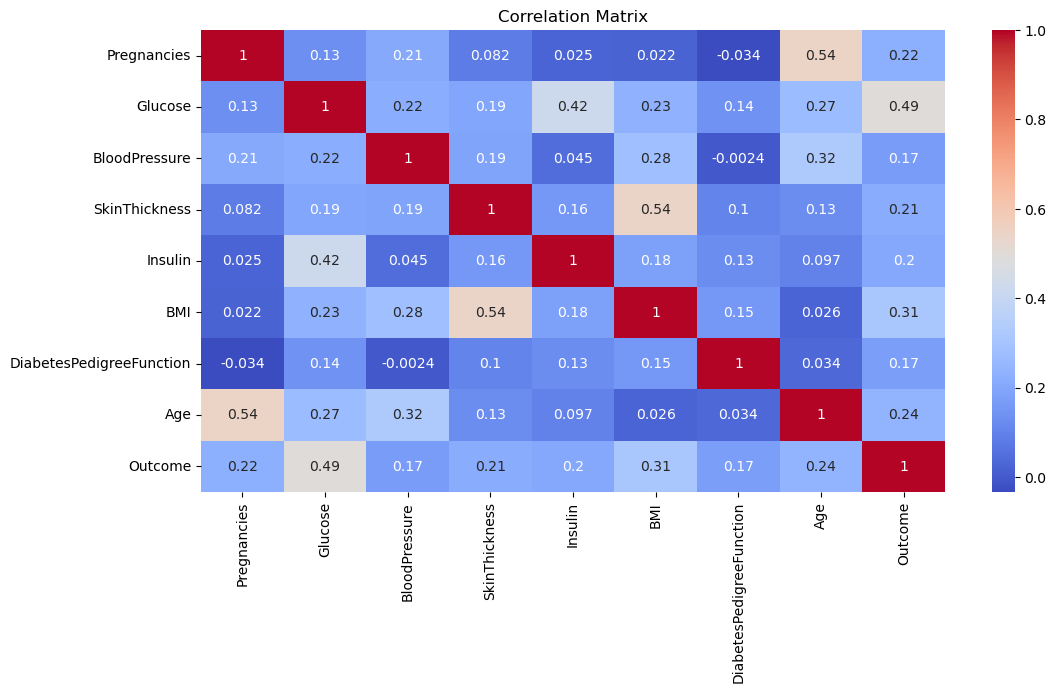

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Strong Positive: 0.7 to 1
#### Moderate Positive: 0.3 to 0.7
#### Weak Positive : 0 to 0.3
#### No correlation: 0(-0.1 to 0.1)
#### Weak Negative: -0.3 to 0
#### Moderate Negative: -0.7 to -0.3
#### Strong Negative: -1.0 to -0.7


#### Glucose --> Strongly Correlated with Outcome
#### BMi --> Moderately Correlated with Outcome
#### Age --> Moderately Correlated with Outcome
#### SkinThickness --> Moderately Correlated with Outcome (SkinThickness & BMI Correlate each other)
#### BloodPressure --> Weakly Correlated with Outcome

In [ ]:
# Step - 4 : Data Cleaning

# We already Did this step in EDA where we identified 0's and replaced with Nan and later we replaced with median values.
# we Verified there are no missing values remain.

In [ ]:
# Step - 5 : Feature Understanding

# This step is also completed where we analyzed all the features using distribution plots, heatmap.

#### What feature understanding means:

#### 1)Knowing what each feature represents

#### 2)Knowing which features are strong / weak

#### 3)Understanding relationships with target

#### 4)Understanding redundancy between features

In [ ]:
# Step - 6 : DATA PREPROCESSING
# Step - 6.1 : SPLITTING THE DATA INTO TRAIN AND TEST SET
from sklearn.model_selection import train_test_split

X = data.drop('Outcome',axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

#### The "random_state" argument is a seed value used to initialize a pseudo-random number generator. It ensures that any randomized processes in your code—such as splitting data or training a model—produce the exact same results every time the code is run.

#### "stratify=y" means that the dataset is split in a way that preserves the same proportion of target variable classes (labels) in both the training and testing sets as in the original dataset.

#### What is Data Preprocessing?
#### Data preprocessing means transforming cleaned data into a form that ML algorithms can learn from effectively.
#### This step contains :
##### 1) Train-test split
##### 2) Feature scaling
##### 3) Handle Class Imbalance

In [ ]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [ ]:
y.value_counts() # therefore if we observe above 2 lines of code data is divided into 2 groups for both training and testing.

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
# Step - 6.2 : Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Feature scaling is a data preprocessing technique used to transform numerical features into a common, comparable scale without distorting their original relative differences. It is essential for ensuring that machine learning models treat all input variables equitably, especially when they are measured in different units

#### If scales are different for different features then large - scaled features will dominate small - scaled features (Model becomes biased) .So that is the reason we use feature scaling.

#### Scaling is needed for models that depend on distance, magnitude, or gradient optimization.

#### Scaling is NOT needed for tree-based models.

#### Models Need Scaling :
##### 1) Logistic Regression
##### 2) KNN
##### 3) KMeans
##### 4) SVM
##### 5) Neural Networks
##### 6) PCA

#### Models Don't Need Scaling :
##### 1) Decision Tree (Regression & Classification)
##### 2) Random Forest (Regression & Classification)
##### 3) XGBoost (Regression & Classification)
##### 4) LightGBM (Regression & Classification)
##### 5) CatBoost (Regression & Classification)
##### 6) Gradient Boosting (Regression & Classification)


## WHEN to use WHICH scaler:
### Use StandardScaler (Z-score scaling) when:

#### 1)Data has outliers

#### 2)Data is approximately normal or skewed

#### Using:

#### 1)Logistic Regression

#### 2)Linear / Ridge / Lasso

#### 3)SVM

#### 4)KNN

#### 5)PCA

#### 6)Neural Networks

### Use MinMaxScaler when:

#### Data has no significant outliers

#### You need values in a fixed range

#### Using:

#### 1)Neural networks with sigmoid/tanh

#### 2)Image data (pixel values)

#### 3)Distance-based algorithms where bounds matter

In [ ]:
# Step - 7 : ML Model Basics

#### What is an ML model?

##### An ML model is a mathematical function that learns a relationship between inputs (features) and output (target).

#### Why Logistic Regression as the FIRST model?

##### Despite the name, Logistic Regression is a classification model.

#### Why it is perfect for first step:

##### 1)Designed for binary classification

##### 2)Outputs probability

##### 3)Easy to interpret

##### 4)Works well with scaled data

In [ ]:
# Step - 8 : Training the model

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

In [ ]:
# Interpreting the Logistic Regression coefficients
# Get feature names
feature_names = X.columns

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_model.coef_[0]
})

# Sort by absolute importance
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df)

                    Feature  Coefficient  Abs_Coefficient
1                   Glucose     1.182511         1.182511
5                       BMI     0.688735         0.688735
0               Pregnancies     0.377502         0.377502
6  DiabetesPedigreeFunction     0.233386         0.233386
7                       Age     0.147798         0.147798
4                   Insulin    -0.066157         0.066157
2             BloodPressure    -0.044066         0.044066
3             SkinThickness     0.028225         0.028225


#### Glucose --> Strong positive coefficient
#### BMI --> Moderate positive coefficient
#### Age --> Moderate positive coefficient


#### “I interpreted Logistic Regression coefficients after feature scaling. Glucose had the strongest positive coefficient, confirming it as the most influential predictor. BMI and age showed moderate effects, while blood pressure and skin thickness had minimal independent impact. This aligned well with insights from EDA and correlation analysis.”

In [ ]:
# Step - 9 : Model Evaluation
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, recall_score, roc_curve,roc_auc_score
print('Accuracy of the model is :',accuracy_score(y_test,y_pred))

print('Confusion matrix of the model is :',confusion_matrix(y_test,y_pred))

print('Classification report of the model is :')
print(classification_report(y_test,y_pred))

Accuracy of the model is : 0.7077922077922078
Confusion matrix of the model is : [[82 18]
 [27 27]]
Classification report of the model is :
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



#### “After training a baseline Logistic Regression model, I evaluated it using accuracy, confusion matrix, precision, recall, and F1-score, with special focus on recall due to the medical context of the problem.”

#### “Accuracy measures the overall correctness of a classification model.”
#### “Precision measures how many predicted positive cases are actually positive.”
#### “Recall measures how many actual positive cases the model successfully identifies.”
#### A confusion matrix is a table that shows how many predictions were correct and how many were wrong, broken down by class.
#### F1-score is a single number that balances Precision and Recall.

### Applying Threshold Tuning to improve accuracy

#### Threshold tuning is the process of selecting an optimal probability cutoff for converting predicted probabilities into class labels, instead of using the default threshold (usually 0.5), in order to better balance performance metrics such as accuracy, recall, and precision based on the problem context.

##### lower threshold gives diabetic patents
##### higher threshold miss diabetic patents
##### middle range gives better practical choice

In [ ]:
# step - 1: get probabilities from the trained model
y_probs = log_model.predict_proba(X_test_scaled)[:, 1]

# step - 2: choose the threshold
threshold = 0.45

# Step 3: Convert probabilities into class labels (0 or 1)
y_pred_045 = (y_probs >= threshold).astype(int)

print('Accuracy score :',accuracy_score(y_test, y_pred_045))

Accuracy score : 0.7077922077922078


#### “To improve accuracy, I applied threshold tuning to the Logistic Regression model. However, the accuracy remained unchanged, indicating that the dataset has inherent class overlap and that the model had already extracted the maximum performance possible from the given features. This confirms that the data is realistic and should not be arbitrarily altered or reduced.”

AUC :  0.812962962962963


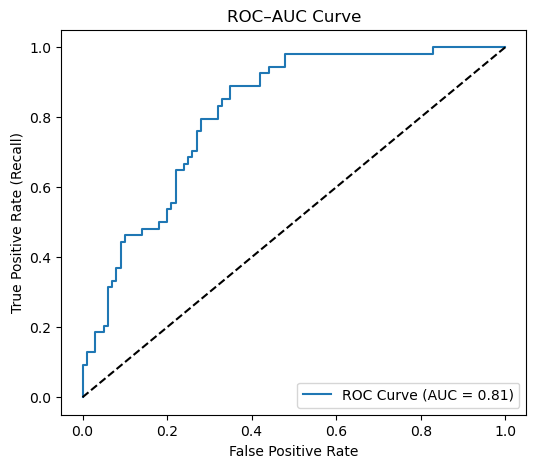

In [ ]:
# ROC - AUC (ROC-AUC measures separation power)

# get predicted probabilities
y_probs = log_model.predict_proba(X_test_scaled)[:,1]

# calculate FPR,TPR for ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# ROC_AUC_Score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC : ",auc_score)
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random guessing line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC–AUC Curve')
plt.legend()
plt.show()


#### “I used the ROC–AUC curve to evaluate the model’s ability to distinguish between diabetic and non-diabetic cases across all thresholds. Even though accuracy plateaued, the ROC–AUC score confirmed that the model had reasonable class separation.”

#### “Although accuracy saturated around 70%, the ROC–AUC score was 0.81, indicating strong class separation ability. This confirms that the model effectively ranks diabetic risk, and performance is limited mainly by inherent data overlap rather than poor modeling.”